# Análisis de ventas del supermercado
El CSV 'Sales' contiene información de las ventas de un supermercado que cuenta con tres sucursales, A, B y C, ubicadas cada una en localidades distintas. Los datos corresponder a las ventas realizadas durante tres meses. Cada fila representa una venta realizada, y brinda información de cada una de ellas como ser: 
- Invoice ID : ID de la venta
- Branch : Tienda (Sucursal)
- City : Ciudad
- Customer Type : Tipo de comprador (Si es miembro o no)
- Gender : Género del comprador
- Product Line : Línea de productos vendidos
- Unit Price : Precio unitario
- Quantity : Cantidad de productos
- Tax 5% : Impuestos del 5%
- Total : Importe total resultante de la venta
- Date : Fecha de la venta
- Time : Hora de la venta
- Payment : Método de pago
- cogs : Costo de la mercaderia vendida
- gross margin percentage : Porcentaje de ganancia marginal
- gross income : Importe de ganancia
- Rating : Calificación por parte del comprador

## Objetivos del análisis de datos
El objetivo principal de este análisis es identificar y comprender las características clave de las compras realizadas y los perfiles de los clientes, con el propósito de detectar patrones de comportamiento y tendencias relevantes. Este conocimiento permitirá desarrollar estrategias informadas para optimizar las ventas, mejorar la segmentación del mercado y maximizar la satisfacción del cliente, orientando la toma de decisiones hacia un crecimiento sostenible del negocio.

In [1]:
#Se importan las librerías necesarias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
sales = pd.read_csv('Data/supermarket_sales.csv')

In [3]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


La columna 'cogs' del DataFrame presenta un cálculo incorrecto del costo de mercaderías vendidas, ya que se ha calculado como el producto del precio unitario y la cantidad. Este cálculo no representa el costo de ventas, sino el ingreso neto sin impuestos, lo que afecta directamente las columnas 'gross margin percentage' y 'gross income'.

Para corregir esta discrepancia, he decidido implementar una fórmula que genere aleatoriamente el costo de venta de cada producto, estableciendo un rango razonable entre el 60% y el 80% del valor neto de la venta. Esta aproximación permitirá reflejar de manera más precisa el costo real de las mercancías vendidas, ajustando los valores afectados y mejorando la calidad del análisis.

1. En primer lugar, creo una columna nueva llamada Net Total, la cual calcula Precio por cantidad vendida

In [4]:
sales['Net total'] = sales['Unit price'] * sales['Quantity']

In [5]:
np.random.seed(120)
def generate_value(net_total):
    return round(net_total * random.uniform(0.6 , 0.8), 2)

2. Una vez creada la función que genera un valor de costo de ventas aleatorio, reemplazo la columna original de 'cogs' por los nuevos valores.

In [6]:
sales['cogs'] = sales['Net total'].apply(generate_value)

3. Recalculo y reemplazo los valores de las columnas que estan relacionadas con el 'cogs', es decir: 'gross margin percentage' y 'gross income'

In [7]:
sales['gross margin percentage'] = ((sales['Net total']-sales['cogs'])/sales['Net total'])*100
sales['gross income'] = sales['Net total'] - sales['cogs'] 

4. Resultado del DataFrame con los nuevos datos:

In [8]:
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Net total
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,401.22,23.259951,121.61,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,52.91,30.746073,23.49,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,250.67,22.706670,73.64,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,336.45,27.763226,129.31,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,369.71,38.806958,234.46,5.3,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,30.34,24.807931,10.01,6.2,40.35
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,778.59,20.046211,195.21,4.4,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,21.06,33.856784,10.78,7.7,31.84
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,44.86,31.844424,20.96,4.1,65.82


### Limpieza y corrección de datos

In [9]:
#Reconocimiento de la cantidad y tipos de datos
print(sales.info())
print(sales.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [10]:
#Correción de tipos de datos
sales[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']] = sales[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']].astype('string')
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Time'] = pd.to_datetime(sales['Time'],format='%H:%M').dt.time

In [11]:
#Control de existencia de valores nulos 
sales.isna().sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Net total                  0
dtype: int64

In [12]:
#Control de valores duplicados
sales[sales.duplicated()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Net total


In [13]:
sales


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Net total
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,401.22,23.259951,121.61,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,52.91,30.746073,23.49,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,250.67,22.706670,73.64,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,336.45,27.763226,129.31,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,369.71,38.806958,234.46,5.3,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,30.34,24.807931,10.01,6.2,40.35
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,778.59,20.046211,195.21,4.4,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,21.06,33.856784,10.78,7.7,31.84
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,44.86,31.844424,20.96,4.1,65.82


In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   string        
 2   City                     1000 non-null   string        
 3   Customer type            1000 non-null   string        
 4   Gender                   1000 non-null   string        
 5   Product line             1000 non-null   string        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [15]:
#Guardado del DF como archivo csv para su posterior utilización
sales.to_csv('supermarket_sales_updated.csv', index=False)

### Análisis exploratorio

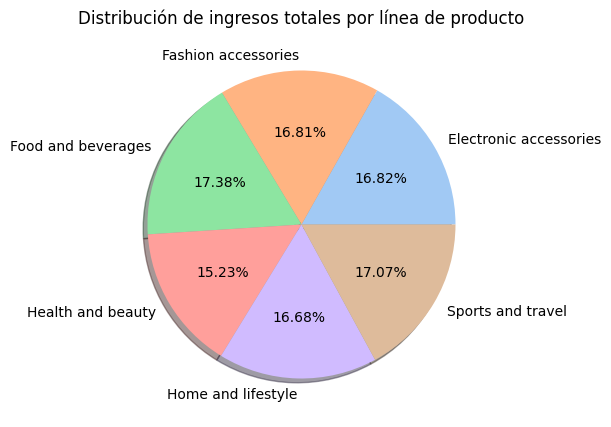

In [16]:
plt.figure(figsize=(8,5))
pastel_colors = sns.color_palette('pastel')
sales.groupby('Product line')['Total'].sum().plot(kind = 'pie',shadow = True,autopct = '%.2f%%', colors=pastel_colors)
plt.title('Distribución de ingresos totales por línea de producto',size=12)
sns.color_palette('pastel')
plt.ylabel('')
plt.show()

La categoría que representa el mayor porcentaje de ingresos totales es "food and beverages"

In [17]:
#Análisis de categorías más vendidas entre mujeres
women_sales = sales[sales['Gender'] == 'Female']
women_sales_category= women_sales['Product line'].value_counts()
women_sales_category_sorted = women_sales_category.sort_values(ascending=False).reset_index()
#Ordeno la tabla resultante y aplico reset_index para poder acceder a las categorías con mayor cantidad de ventas mediante .iloc
first_category_women = women_sales_category_sorted.iloc[0,0]
second_category_women = women_sales_category_sorted.iloc[1,0]
print(f'Las dos categorías más vendidas entre mujeres son {first_category_women} y {second_category_women}')

Las dos categorías más vendidas entre mujeres son Fashion accessories y Food and beverages


In [18]:
#Análisis de categorías más vendidas entre hombres
men_sales = sales[sales['Gender'] == 'Male']
men_sales_category= men_sales['Product line'].value_counts()
men_sales_category_sorted = men_sales_category.sort_values(ascending=False).reset_index()
print(f'Las dos categorías más vendidas entre hombres son {men_sales_category_sorted.iloc[0,0]} y {men_sales_category_sorted.iloc[1,0]}')


Las dos categorías más vendidas entre hombres son Health and beauty y Electronic accessories


In [19]:
#Análisis de compras por género y ubicación
sales_by_gender = sales.groupby('City')['Gender'].value_counts(normalize=True).reset_index().sort_values(['City', 'proportion'], ascending=[True,False])
sales_by_gender['proportion'] = sales_by_gender['proportion'].round(2)
sales_by_gender

,City,Gender,proportion
0,Mandalay,Male,0.51
1,Mandalay,Female,0.49
2,Naypyitaw,Female,0.54
3,Naypyitaw,Male,0.46
4,Yangon,Male,0.53
5,Yangon,Female,0.47


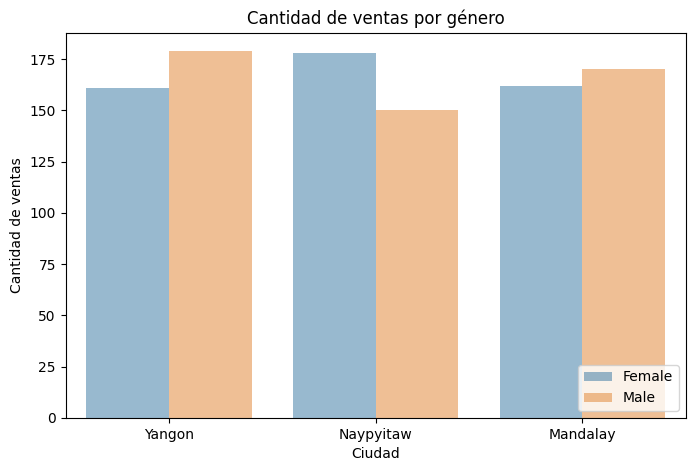

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=sales, x='City', hue='Gender', alpha=0.5)
plt.title('Cantidad de ventas por género', size=12)
plt.ylabel('Cantidad de ventas')
plt.xlabel('Ciudad')
plt.legend(loc='lower right')
plt.show()

In [21]:
#Uso idxmax() para seleccionar los índices con mayor proporción y luego filtrarlos en el DF original
idx = sales_by_gender.groupby('City')['proportion'].idxmax()
max_proportion_by_city = sales_by_gender.loc[idx]
max_proportion_by_city

,City,Gender,proportion
0,Mandalay,Male,0.51
2,Naypyitaw,Female,0.54
4,Yangon,Male,0.53


In [22]:
#Conversión en diccionario para poder acceder fácilmente a la respuesta de Género de mayor compras por ciudad.
gender_proportion_by_city = max_proportion_by_city.to_dict('records')
gender_proportion_by_city

[{'City': 'Mandalay', 'Gender': 'Male', 'proportion': 0.51},
 {'City': 'Naypyitaw', 'Gender': 'Female', 'proportion': 0.54},
 {'City': 'Yangon', 'Gender': 'Male', 'proportion': 0.53}]

In [23]:
#Análisis de ingresos totales por mes
#Conviersión de la columna Date al tipo DateTime. Creación de una lista que contenga el orden de los meses, para que no se ordenen alfabéticamente.
month_order = ['January', 'February', 'March']
sales['Month'] = pd.Categorical(sales['Date'].dt.month_name(), categories = month_order, ordered=True)
sales_by_month=sales.groupby('Month', observed=False)['Total'].sum().reset_index()
sales_by_month


,Month,Total
0,January,116291.868
1,February,97219.374
2,March,109455.507


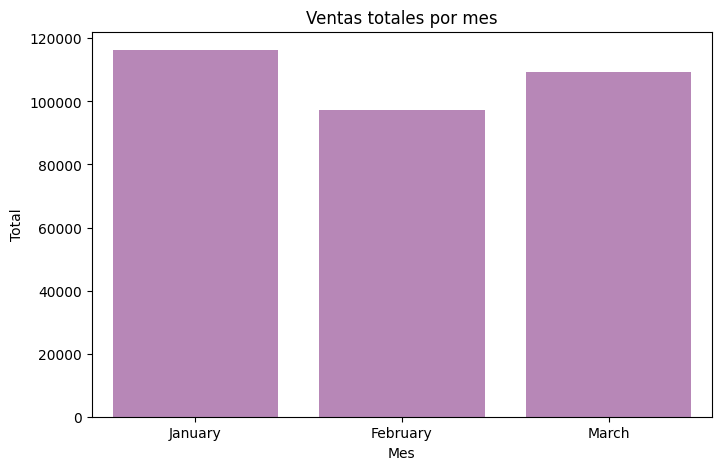

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(data=sales_by_month, x='Month', y='Total', errorbar=None, color='purple', alpha=0.5)
plt.title('Ventas totales por mes', size=12)
plt.ylabel('Total')
plt.xlabel('Mes')
plt.show()

In [25]:
sales_by_month_sorted = sales_by_month.sort_values('Total', ascending=False)
sales_by_month_sorted
max_total_sales_by_month = sales_by_month_sorted.iloc[0,0]
max_total_sales = sales_by_month_sorted.iloc[0,1]
print(f'El mes de {max_total_sales_by_month} es el que mayor ventas registra, con un ingreso total por ventas de $ {max_total_sales}')


El mes de January es el que mayor ventas registra, con un ingreso total por ventas de $ 116291.868


      Month       Total
0   January  330.374625
1  February  320.856020
2     March  317.262339


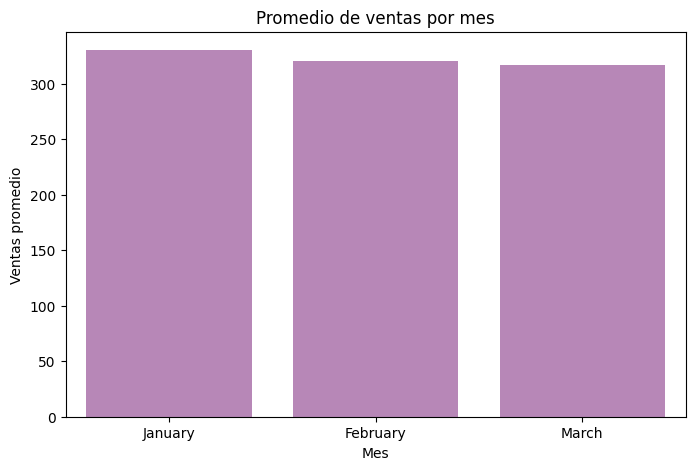

In [26]:
#Cálculo de ingresos promedio por mes
sales_mean_by_month=sales.groupby('Month', observed=True)['Total'].mean().reset_index()
print(sales_mean_by_month)

plt.figure(figsize=(8,5))
sns.barplot(data=sales_mean_by_month, x='Month', y='Total', errorbar=None, color='purple', alpha=0.5)
plt.title('Promedio de ventas por mes', size=12)
plt.ylabel('Ventas promedio')
plt.xlabel('Mes')
plt.show()


In [27]:
sales_mean_by_month_sorted = sales_mean_by_month.sort_values('Total', ascending=False)
max_mean_total_sales_by_month = sales_mean_by_month_sorted.iloc[0,0]
max_mean_total_sales = sales_mean_by_month_sorted.iloc[0,1]
print(f'{max_mean_total_sales_by_month} es el mes con mayor promedio de ingresos por ventas, con un importe de $ {max_mean_total_sales}')

January es el mes con mayor promedio de ingresos por ventas, con un importe de $ 330.374625


In [28]:
#Con groupby agrupo por mes la ganancia marginal, calculo su promedio, y ordeno el dataframe resultante en base a la ganancia marginal, de manera descendente.
gross_margin_by_month=sales.groupby('Month', observed=True)['gross margin percentage'].mean().reset_index().sort_values('gross margin percentage', ascending=False)
gross_margin_by_month


,Month,gross margin percentage
2,March,29.798517
0,January,29.692559
1,February,29.496082


In [29]:
max_gross_margin_percentage_by_month = gross_margin_by_month.iloc[0,0]
print(f'El mes de {max_gross_margin_percentage_by_month} fue el mes con mayor porcentaje de margen bruto')

El mes de March fue el mes con mayor porcentaje de margen bruto


In [30]:
gross_margin_by_sucursal = sales.groupby('City')['gross margin percentage'].mean().reset_index().sort_values('gross margin percentage', ascending=False)
gross_margin_by_sucursal

,City,gross margin percentage
2,Yangon,29.759851
1,Naypyitaw,29.641144
0,Mandalay,29.605233


In [31]:
max_gross_margin_percentage_by_city = gross_margin_by_sucursal.iloc[0,0]
print(f'La sucursal de la ciudad de {max_gross_margin_percentage_by_city} es la que obtuvo un mayor porcentaje de margen bruto')

La sucursal de la ciudad de Yangon es la que obtuvo un mayor porcentaje de margen bruto


In [32]:
#Rating promedio de todas las sucursales
rating_mean = sales['Rating'].mean()
rating_mean


6.9727

In [33]:
rating_mean_by_city = sales.groupby('City')['Rating'].mean().reset_index()
rating_mean_by_city

,City,Rating
0,Mandalay,6.818072
1,Naypyitaw,7.072866
2,Yangon,7.027059


In [34]:
max_rating_mean_by_city = rating_mean_by_city[rating_mean_by_city['Rating']== rating_mean_by_city['Rating'].max()]
max_rating_mean_by_city

,City,Rating
1,Naypyitaw,7.072866


In [35]:
max_mean_rating_city = rating_mean_by_city.iloc[0,0]
max_mean_rating = max_rating_mean_by_city.iloc[0,1].round(2)
print(f'La sucursal ubicada en {max_mean_rating_city} es la que obtuvo una mejor calificación por parte de los clientes, con una puntuación de {max_mean_rating}')

La sucursal ubicada en Mandalay es la que obtuvo una mejor calificación por parte de los clientes, con una puntuación de 7.07


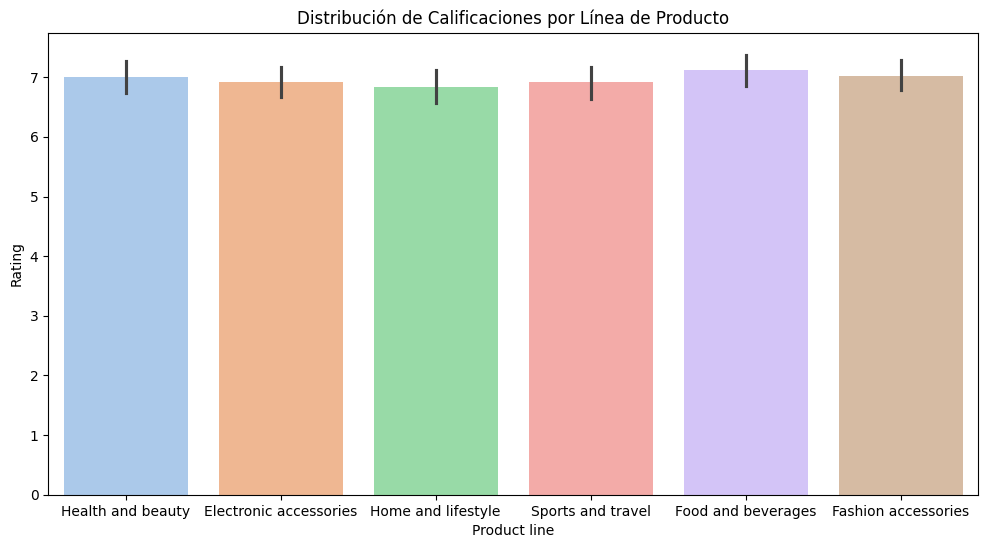

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sales, x='Product line', y='Rating', hue= 'Product line',palette='pastel')
plt.title('Distribución de Calificaciones por Línea de Producto', fontsize=12)
plt.show()

En promedio todos los productos rondan el puntaje de 7 puntos, lo que demuestra un alto nivel de satisfacción por parte de los clientes.

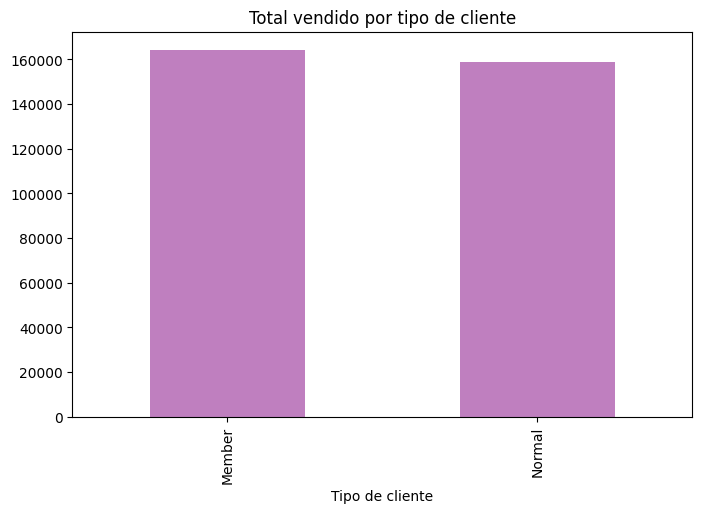

In [37]:
plt.figure(figsize=(8,5))
sales.groupby('Customer type')['Total'].sum().plot(kind = 'bar', color='purple', alpha=0.5)
plt.title('Total vendido por tipo de cliente', size=12)
plt.xlabel('Tipo de cliente')
plt.show()

Las ventas totales son mayores para aquellos clientes que pagan una membresía, esto sugiere que el programa ofrecido para miembros es efectivo a la hora de atraer clientes.

## **Conclusiones**
### **Rendimiento por Categoría de Producto**
- La categoría que genera mayores ingresos totales es **Comida y Bebidas**, destacándose como el principal motor de ventas del supermercado.
- **Género y Preferencias:**
  - Las mujeres prefieren las categorías **Accesorios de Moda** y **Comidas y Bebidas**.
  - Los hombres realizan más compras en **Salud y Belleza** y **Accesorios Electrónicos**.

### **Análisis por Sucursal**
- **Distribución de Ventas por Género:**
  - En las sucursales de **Mandalay** y **Yangon**, los hombres representan más del 50% de las ventas totales.
  - En **Naypyitaw**, las mujeres lideran con un 54% de las ventas totales.
- **Margen Bruto y Satisfacción del Cliente:**
  - La sucursal de **Naypyitaw** logró el mayor porcentaje de margen bruto.
  - Esta sucursal también obtuvo la mejor calificación promedio por parte de los clientes (7.07), ligeramente superior al promedio general (6.97).

### **Análisis Temporal**
- **Mes con Mejores Resultados:**
  - **Enero** registró los mayores ingresos por ventas totales y el mayor ingreso promedio, destacándose también con el mayor porcentaje de margen bruto.

### **Satisfacción y Líneas de Producto**
- En términos de satisfacción, todas las líneas de productos mantienen una calificación promedio cercana a 7, lo que refleja un alto nivel de satisfacción general de los clientes.

### **Impacto del Programa de Membresía**
- Los clientes con membresía generan mayores ingresos totales, indicando que el programa es efectivo para atraer y fidelizar clientes.


### **Conclusión Final**

En resumen, el análisis de ventas del supermercado ha revelado patrones valiosos que pueden informar decisiones estratégicas. La categoría de **Comida y Bebidas** es la más rentable y debería ser prioritaria en futuras estrategias de promoción. Las diferencias en las preferencias de compra por género y sucursal ofrecen oportunidades para implementar campañas personalizadas.

El programa de membresías demuestra ser eficaz para aumentar los ingresos. Además, las altas calificaciones promedio refleja un alto nivel de satisfacción del cliente, lo cual es un activo clave para la retención de clientes.

Por último, se recomienda continuar monitoreando las tendencias mensuales y el desempeño por sucursal, y priorizar el fortalecimiento de la experiencia en Naypyitaw, dado su rendimiento destacado tanto en margen bruto como en satisfacción del cliente.